## Notebook for Assignment ML - By Lalit (22 MCS 2021)
#### This is rough notebook so more clear report is made from this notebook's obeservations

In [112]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from chefboost import Chefboost as chef
from sklearn.utils import shuffle
import matplotlib.pyplot as pltpy

In [7]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df = pd.read_csv('car_sample.csv')

In [92]:
df_main = df.sample(frac = 1)

In [10]:
config = {'algorithm': 'ID3'}
model = chef.fit(df, config = config, target_label = 'Class')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  27.702123641967773  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  95.8041958041958 % on  286  instances
Labels:  ['recurrence-events' 'no-recurrence-events']
Confusion matrix:  [[82, 9], [3, 192]]
Precision:  90.1099 %, Recall:  96.4706 %, F1:  93.1818 %


In [93]:
df = df.iloc[:100,:]

In [12]:
df = df.drop(df.iloc[:,0:1], axis = 1)

In [48]:
df.to_csv("car_sample.csv")

In [27]:
class GadId3Classifier_g:
  list_ = []
  def getmetric(self) :
    return self.list_
    
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def gini(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(probability*probability)

    # calculate sum of individual entropy values
    total_gini = 1 - np.sum(entropy_list)

    return total_gini

  def gini_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_gini = self.gini(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_gini_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.gini(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_gini_list.append(subset_probability*subset_entropy)

    total_weighted_gini = np.sum(weighted_gini_list)

    # calculate information gain
    gini_gain = total_gini - total_weighted_gini

    return gini_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.gini_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      self.list_.append(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [175]:
model2 = DecisionTreeClassifier()
tree2 = model2.fit(df[df.columns[0:5]], df[df.columns[6]])

ValueError: could not convert string to float: 'high'

In [174]:

tree2

{'persons': {'2': 'unacc',
  '4': {'buying': {'high': {'lug_boot': {'big': {'maint': {'high': 'acc',
        'low': 'acc',
        'vhigh': 'unacc'}},
      'med': 'unacc',
      'small': 'unacc'}},
    'low': {'doors': {'3': {'maint': {'high': 'acc',
        'low': 'vgood',
        'vhigh': 'acc'}},
      '4': {'maint': {'high': 'unacc', 'low': 'good'}},
      '5more': {'maint': {'high': 'vgood',
        'low': 'unacc',
        'med': 'unacc',
        'vhigh': 'unacc'}}}},
    'med': {'maint': {'high': {'lug_boot': {'big': 'unacc',
        'med': 'unacc',
        'small': 'acc'}},
      'low': 'unacc',
      'med': 'acc',
      'vhigh': {'doors': {'2': 'unacc',
        '5more': {'lug_boot': {'big': 'acc'}}}}}},
    'vhigh': {'maint': {'high': 'unacc',
      'low': {'lug_boot': {'big': 'acc', 'med': 'unacc', 'small': 'unacc'}},
      'med': {'doors': {'3': 'unacc', '5more': 'acc'}},
      'vhigh': 'unacc'}}}},
  'more': {'maint': {'high': {'doors': {'2': 'unacc',
      '3': 'unacc',
  

In [161]:
class GadId3Classifier:
  list_ = []
  def getmetric(self) :
    return self.list_

  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    
    
    values, counts = np.unique(attribute_column, return_counts=True)
    
    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []
    problist = []
    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      problist.append(subset_probability)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)
    
    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      self.list_.append(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [172]:
model_f = GadId3Classifier()
tree_f = model_f.fit(x,y)

NameError: name 'tr' is not defined

In [67]:
ig = model.getmetric()

In [69]:
len(ig)

39

In [62]:
class GadId3Classifier_e:
  list_ = []
  def getmetric(self) :
    return self.list_

  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def missclassification_error(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      #print(probability)
      entropy_list.append(probability)

    # calculate sum of individual entropy values
    merror = 1 - np.max(entropy_list)
    print("In merror : ", merror)

    return merror

  def gain_in_error(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_error = self.missclassification_error(data[target_attribute_name])
    print("Total error in gain ", total_error)
    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_error_list = []
    subset_probability = 0
    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_error = self.missclassification_error(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_error_list.append(subset_probability*subset_error)

    total_weighted_error = np.sum(weighted_error_list)
    print("Total weighted error ", total_weighted_error)

    # calculate information gain
    error_gain = total_error - total_weighted_error

    return error_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.gain_in_error(data, feature, target_attribute_name) for feature in feature_attribute_names]
      self.list_.append(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [76]:
model_e= GadId3Classifier_e()
tree_e = model_e.fit(df[df.columns[0:5]], df[df.columns[6]])

In [87]:
e = model_e.getmetric()

In [165]:
class GadId3Classifier_gr:
  list_ = []
  def getmetric(self) :
    return self.list_

  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      #print(probability)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def gain_ratio(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []
    problist = []
    sp = []
    for i in range(len(values)):
      print(counts[i])

      subset_probability = counts[i]/np.sum(counts)
      problist.append(subset_probability)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)
      sp.append(-subset_probability*np.log2(subset_probability))
    split_info = np.sum(sp)
    
    total_weighted_entropy = np.sum(weighted_entropy_list)
    

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain/split_info

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      self.list_.append(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [66]:
model_e= GadId3Classifier_e()
tree_e = model_e.fit(df[df.columns[0:5]], df[df.columns[6]])

In merror :  0.27
Total error in gain  0.27
In merror :  0.1724137931034483
In merror :  0.4545454545454546
In merror :  0.2692307692307693
In merror :  0.21739130434782605
Total weighted error  0.27
In merror :  0.27
Total error in gain  0.27
In merror :  0.28
In merror :  0.25
In merror :  0.38888888888888884
In merror :  0.19999999999999996
Total weighted error  0.27
In merror :  0.27
Total error in gain  0.27
In merror :  0.19999999999999996
In merror :  0.35
In merror :  0.25
In merror :  0.2857142857142857
Total weighted error  0.26999999999999996
In merror :  0.27
Total error in gain  0.27
In merror :  0.0
In merror :  0.32499999999999996
In merror :  0.4516129032258065
Total weighted error  0.27
In merror :  0.27
Total error in gain  0.27
In merror :  0.42307692307692313
In merror :  0.2857142857142857
In merror :  0.125
Total weighted error  0.27
In merror :  0.19999999999999996
Total error in gain  0.19999999999999996
In merror :  0.0
In merror :  0.5
In merror :  0.199999999

In merror :  0.2857142857142857
Total error in gain  0.2857142857142857
In merror :  0.2222222222222222
In merror :  0.30000000000000004
In merror :  0.4285714285714286
In merror :  0.2222222222222222
Total weighted error  0.2857142857142857
In merror :  0.2857142857142857
Total error in gain  0.2857142857142857
In merror :  0.36363636363636365
In merror :  0.2222222222222222
In merror :  0.5
In merror :  0.11111111111111116
Total weighted error  0.2857142857142857
In merror :  0.2857142857142857
Total error in gain  0.2857142857142857
In merror :  0.0
In merror :  0.2941176470588235
In merror :  0.5555555555555556
Total weighted error  0.2857142857142857
In merror :  0.2857142857142857
Total error in gain  0.2857142857142857
In merror :  0.4285714285714286
In merror :  0.375
In merror :  0.0
Total weighted error  0.2571428571428572
In merror :  0.4285714285714286
Total error in gain  0.4285714285714286
In merror :  0.0
In merror :  0.0
In merror :  0.33333333333333337
In merror :  0.5

In [86]:
gr = model_gr.getmetric()

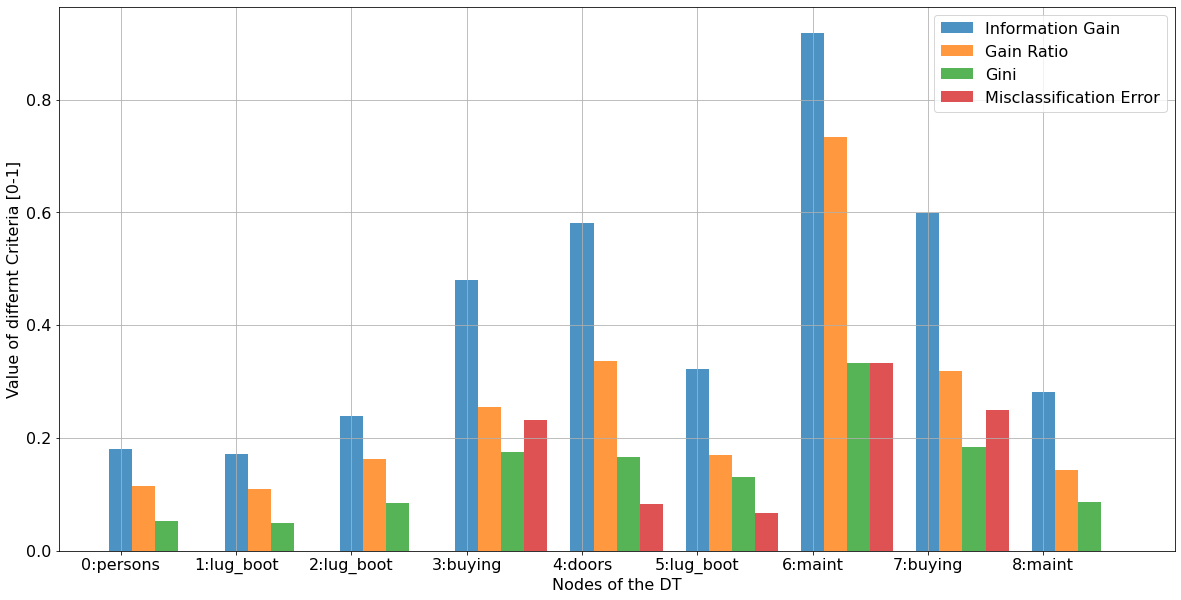

In [177]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
pltpy.rcParams['figure.figsize'] = [20, 10]
infogain = [0.17940047621,0.171764188551085,0.238158637458,0.4793394888389986,0.5817041659455106,0.3219280948873623,0.918295831054,0.5986009757768619,0.28103611255342353]
gainratio = [0.1142336505036623,0.10880017266296521,0.1621158976506517,0.25438414667578957,0.33632800903490767,0.1704002664921813,0.733680436651211,0.3179217930249427,0.1423012689679485]
gini = [0.05180967741935488,0.04913461538461544,0.08391143484795938,0.17573964497041422,0.16666666666666674,0.13111111111111096,0.3333333333333334,0.184375,0.08641975308641975]
gain_merror = [0.000000000000001,0.0000000000000002,5.551115123125783e-17,0.23076923076923073,0.08333333333333331,0.0666666666666666,0.3333333333333334,0.25,5.551115123125783e-17]
width = 0.2
i = 0.2
plt.bar(np.arange(9), infogain, width=width, align = "center", alpha = 0.8)
plt.bar(np.arange(9)+ i, gainratio, width=width,align = "center",alpha = 0.8)
plt.bar(np.arange(9)+ 2*i, gini, width=width,align = "center",alpha = 0.8)
plt.bar(np.arange(9)+ 3*i, gain_merror, width=width,align = "center",alpha = 0.8)

plt.grid(True)
plt.ylabel("Value of differnt Criteria [0-1]")
plt.legend(["Information Gain","Gain Ratio","Gini","Misclassification Error"])
plt.xticks(np.arange(9),["0:persons","1:lug_boot","2:lug_boot","3:buying","4:doors","5:lug_boot","6:maint","7:buying","8:maint"])
plt.xlabel("Nodes of the DT")
plt.show()

In [93]:
data1[0:5]

[0.5, 0.48855486219284505, 1.0, 0.9056390622295665, 1.0]

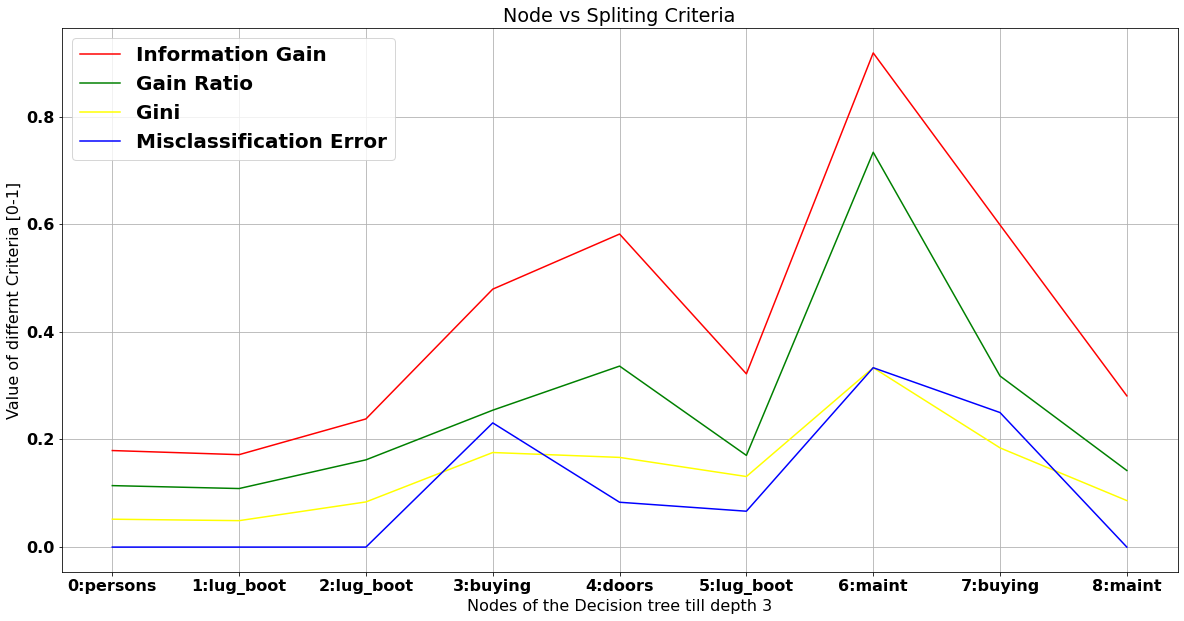

In [176]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
pltpy.rcParams['figure.figsize'] = [20, 10]
plt.plot(infogain, linestyle = 'solid',color='r')
plt.plot(gainratio, linestyle = 'solid',color='g')
plt.plot(gini, linestyle = 'solid',color='yellow')
plt.plot(gain_merror, linestyle = 'solid',color='b')
plt.legend(["Information Gain","Gain Ratio","Gini","Misclassification Error"],prop={'size': 20})
plt.xlabel("Nodes of the Decision tree till depth 3")
plt.ylabel("Value of differnt Criteria [0-1]")
plt.title("Node vs Spliting Criteria")
plt.xticks(np.arange(9),["0:persons","1:lug_boot","2:lug_boot","3:buying","4:doors","5:lug_boot","6:maint","7:buying","8:maint"])
plt.grid(True)
plt.show()

In [142]:
test = GadId3Classifier_gr

In [143]:
test.information_gain()

<function __main__.GadId3Classifier_gr.information_gain(self, data, feature_attribute_name, target_attribute_name)>

In [67]:
tree_e

{'doors': {'2': {'buying': {'high': 'unacc',
    'low': {'maint': {'low': 'unacc', 'vhigh': 'acc'}},
    'med': {'maint': {'high': 'unacc',
      'low': {'lug_boot': {'big': 'good', 'med': 'unacc', 'small': 'unacc'}},
      'med': 'acc',
      'vhigh': 'unacc'}},
    'vhigh': {'maint': {'high': 'unacc',
      'low': 'unacc',
      'med': 'acc',
      'vhigh': 'unacc'}}}},
  '3': {'buying': {'high': {'maint': {'high': 'acc',
      'low': 'unacc',
      'med': {'lug_boot': {'med': 'acc', 'small': 'unacc'}},
      'vhigh': 'unacc'}},
    'low': {'maint': {'high': {'persons': {'4': 'acc', 'more': 'unacc'}},
      'low': 'vgood',
      'vhigh': 'acc'}},
    'med': {'persons': {'2': 'unacc', 'more': 'good'}},
    'vhigh': {'persons': {'2': 'unacc', '4': 'unacc', 'more': 'acc'}}}},
  '4': {'lug_boot': {'big': {'buying': {'high': {'maint': {'low': 'acc',
        'vhigh': 'unacc'}},
      'low': 'unacc',
      'med': 'unacc',
      'vhigh': 'unacc'}},
    'med': {'buying': {'high': 'unacc',
   

In [161]:
def treeinter(tree, currdepth, depth):
    if currdepth > depth :
        return currdepth
    currdepth = currdepth + 1
    for key , value in tree.items():
        if value == "unacc" :
            print(key)
        elif value == "acc" :
            print(key)
            
        else :
            test.information_gain(df.loc[df['persons'] == '2'], "buying","Decision")
            treeinter(tree[key],currdepth, depth)

In [163]:
r treeinter(tree_gr,0,5)

persons
2
4
buying
high
maint
low
med
vhigh
low
maint
high
low
med
vhigh
med
doors
2
3
4
5more
vhigh
maint
high
low
med
vhigh
more
buying
high
doors
2
3
4
5more
low
maint
high
low
med
vhigh
med
doors
2
3
4
5more
vhigh
doors
2
3
4
5more


In [68]:
df[df["persons"]=="4"]

,buying,maint,doors,persons,lug_boot,safety,Decision
0,high,vhigh,5more,2,med,med,unacc
1,high,high,5more,4,small,low,unacc
2,high,high,5more,4,big,med,acc
3,vhigh,med,3,more,med,med,acc
4,high,vhigh,5more,4,small,high,unacc
...,...,...,...,...,...,...,...
95,high,vhigh,4,more,small,med,unacc
96,vhigh,high,2,2,med,med,unacc
97,med,low,5more,more,med,med,good
98,low,low,3,4,big,high,vgood


In [168]:
test = GadId3Classifier_e()
test.gain_in_error(df_p_more, "lug_boot","Decision")

In merror :  0.4516129032258065
Total error in gain  0.4516129032258065
In merror :  0.6666666666666667
In merror :  0.5625
In merror :  0.11111111111111116
Total weighted error  0.45161290322580644


5.551115123125783e-17

In [73]:
df_p_more = df[df["persons"] == "more"]
df_p_more[df_p_more["lug_boot"] == "big"]
df_p_4 = df[df["persons"] == "4"]

In [56]:
tree2["persons"]['4']['lug_boot']

{'big': {'buying': {'high': {'maint': {'high': 'acc',
     'low': 'acc',
     'vhigh': 'unacc'}},
   'low': {'maint': {'low': 'vgood', 'vhigh': 'acc'}},
   'med': {'doors': {'2': 'unacc',
     '4': 'unacc',
     '5more': {'maint': {'vhigh': 'acc'}}}},
   'vhigh': {'maint': {'high': 'unacc', 'low': 'acc'}}}},
 'med': {'doors': {'2': 'unacc',
   '3': 'unacc',
   '4': 'good',
   '5more': {'maint': {'high': 'vgood',
     'low': 'unacc',
     'med': 'acc',
     'vhigh': 'unacc'}}}},
 'small': {'buying': {'high': 'unacc',
   'low': {'doors': {'3': 'acc', '4': 'unacc', '5more': 'unacc'}},
   'med': {'maint': {'high': 'acc', 'med': 'acc', 'vhigh': 'unacc'}},
   'vhigh': 'unacc'}}}

In [82]:
df[df["persons"] == "2"]

,buying,maint,doors,persons,lug_boot,safety,Decision
0,high,vhigh,5more,2,med,med,unacc
8,med,high,5more,2,small,low,unacc
12,high,vhigh,2,2,big,high,unacc
18,vhigh,low,5more,2,med,med,unacc
21,med,vhigh,4,2,small,med,unacc
23,high,low,3,2,med,low,unacc
24,high,low,2,2,small,low,unacc
26,med,low,2,2,small,low,unacc
28,med,vhigh,4,2,med,med,unacc
31,vhigh,high,5more,2,med,med,unacc


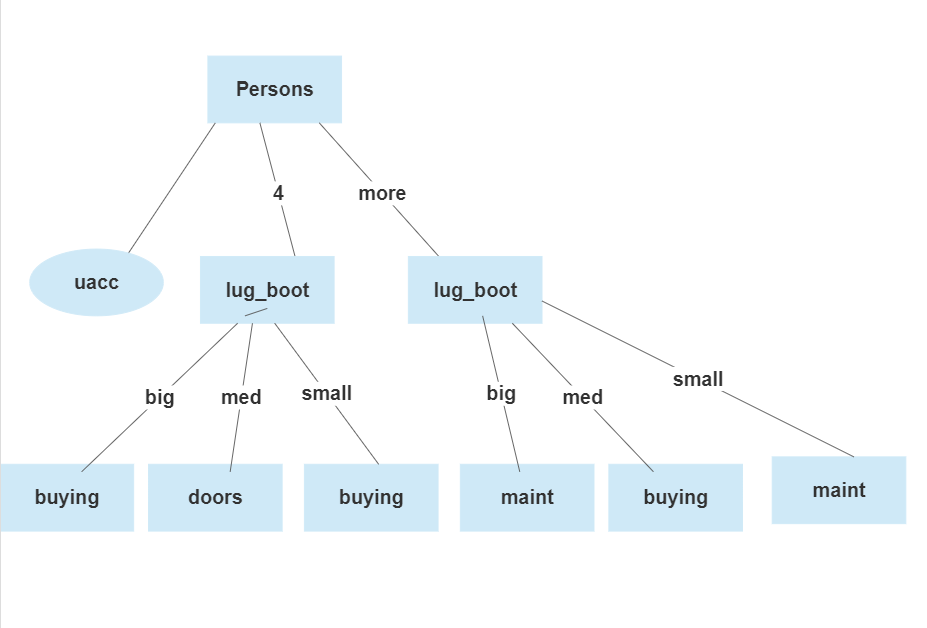